In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Data mining from geopanda dataset
gpd.datasets.available  #dataset in geopandas
gpd.datasets.get_path("naturalearth_lowres") #Extracting coordinates from geopandas
df_world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df_europe=df_world.query("continent=='Europe'")
#df_eu=df_europe.reset_index(drop=True)
#df_eu.to_csv("ricedata/eu_rice.csv")
df_eu=df_europe.query("name !='Russia'").reset_index(drop=True).copy()
display(df_eu.head())

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,5320045,Europe,Norway,-99,364700.0,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80..."
1,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."
2,9960487,Europe,Sweden,SWE,498100.0,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."
3,9549747,Europe,Belarus,BLR,165400.0,"POLYGON ((28.17671 56.16913, 29.22951 55.91834..."
4,44033874,Europe,Ukraine,UKR,352600.0,"POLYGON ((31.78599 52.10168, 32.15944 52.06125..."


In [5]:
# Rice Data courtesy: (https://knoema.com/atlas/)
#Rice data and country coordinates combined
# Countries: 'Spain' 'Italy' 'Greece' 'Portugal' 'Romania' 'Bulgaria' 'France'
df_rice=pd.read_csv("ricedata/eu_rice.csv")
gdf_rice=gpd.GeoDataFrame(df_rice).query("name != 'Russia'").drop(columns={"Unnamed: 0"}).reset_index(drop=True)
#gdf_rice.Year_2020.fillna(0,inplace=True)
display(gdf_rice.head())

,pop_est,continent,name,iso_a3,gdp_md_est,Year_2020,geometry
0,5320045,Europe,Norway,-99,364700,NaN,"MULTIPOLYGON (((15.142820000000002 79.67431, 1..."
1,67106161,Europe,France,-99,2699000,76320.0,MULTIPOLYGON (((-51.65779741067889 4.156232408...
2,9960487,Europe,Sweden,SWE,498100,NaN,POLYGON ((11.027368605196868 58.85614940045936...
3,9549747,Europe,Belarus,BLR,165400,NaN,"POLYGON ((28.17670942557794 56.16912995057879,..."
4,44033874,Europe,Ukraine,UKR,352600,NaN,"POLYGON ((31.78599244755525 52.1016775699397, ..."


Text(66.25, 0.5, 'Latitude')

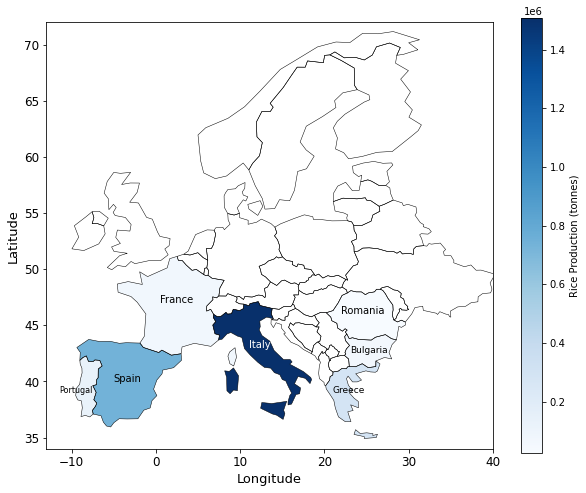

In [54]:
#ploting 
plotting_europe=df_eu.boundary.plot(figsize=(10,25),color="Black",linewidth=0.5)
plotting_europe1=df_eu.plot(figsize=(10,25),column=gdf_rice.Year_2020,ax=plotting_europe,cmap="Blues",
                            legend = True, legend_kwds={"label":"Rice Production (tonnes)","orientation":"vertical",'shrink':0.32})
plotting_europe.set_xlim(-13, 40)
plotting_europe.set_ylim(34,72)
plotting_europe1.tick_params(labelsize=12)
plt.text(-5,40,"Spain",size=10)
plt.text(-11.5,39,"Portugal",size=8)
plt.text(0.5,47,"France",size=10)
plt.text(11,43,"Italy",size=10,color="white")
plt.text(21,39,"Greece",size=9)
plt.text(22,46,"Romania",size=10)
plt.text(23,42.5,"Bulgaria",size=9)
plt.xlabel("Longitude", size=13)
plt.ylabel("Latitude", size=13)